<a href="https://colab.research.google.com/github/micah-shull/pipelines/blob/main/pipelines_16_ensemble_042_class_1_recall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
print(sklearn.__version__)

1.3.2


### Performance Metrics Table

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/combined_model_metrics_with_resampling.csv'
data = pd.read_csv(file_path)
data

,Model,Experiment,Recall_0,Precision_0,F1_0,Recall_1,Precision_1,F1_1,F1_Macro,Accuracy
0,Logistic Regression,baseline,0.969399,0.818724,0.887713,0.244160,0.693790,0.361204,0.624459,0.809000
1,Random Forest,baseline,0.939225,0.839679,0.886667,0.368500,0.632600,0.465714,0.676190,0.813000
2,HistGradientBoosting,baseline,0.942863,0.840198,0.888575,0.368500,0.646825,0.469515,0.679045,0.815833
3,LGBM,baseline,0.947143,0.840486,0.890633,0.366993,0.663488,0.472586,0.681609,0.818833
4,Logistic Regression,class_weight_balanced,0.691419,0.868782,0.770019,0.632253,0.367821,0.465078,0.617548,0.678333
5,Random Forest,class_weight_balanced,0.947143,0.835094,0.887597,0.341372,0.647143,0.446966,0.667281,0.813167
6,HistGradientBoosting,class_weight_balanced,0.942863,0.840198,0.888575,0.368500,0.646825,0.469515,0.679045,0.815833
7,LGBM,class_weight_balanced,0.799700,0.880122,0.837986,0.616428,0.466363,0.530996,0.684491,0.759167
8,Logistic Regression (SMOTE),resampling,0.677509,0.867160,0.760692,0.634514,0.358450,0.458107,0.609399,0.668000
9,Random Forest (SMOTE),resampling,0.890434,0.854941,0.872327,0.467973,0.548102,0.504878,0.688603,0.797000


### Top Models Class 1 Recall & Precision

In [15]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/combined_model_metrics_with_resampling.csv'
df = pd.read_csv(file_path)

# Convert necessary columns to categorical types for better performance and easier grouping
# df[['Experiment', 'Model']] = df[['Experiment', 'Model']].astype('category')

# Get the top 3 models for Recall_1
top_3_recall_1 = df[['Model', 'Experiment', 'Recall_1', 'Precision_1']].sort_values(by='Recall_1', ascending=False).head(3)

# Get the top 3 models for Precision_1
top_3_precision_1 = df[['Model', 'Experiment', 'Recall_1', 'Precision_1']].sort_values(by='Precision_1', ascending=False).head(3)

# Display the top 3 models for Recall_1 and Precision_1
print("Top 3 Models by Recall (Class 1):")
print(top_3_recall_1)

print("\nTop 3 Models by Precision (Class 1):")
print(top_3_precision_1)


Top 3 Models by Recall (Class 1):
                           Model  Experiment  Recall_1  Precision_1
12  Logistic Regression (ADASYN)  resampling  0.666918     0.338173
19     LGBM (RandomUnderSampler)  resampling  0.639789     0.441727
8    Logistic Regression (SMOTE)  resampling  0.634514     0.358450

Top 3 Models by Precision (Class 1):
                 Model             Experiment  Recall_1  Precision_1
0  Logistic Regression               baseline  0.244160     0.693790
3                 LGBM               baseline  0.366993     0.663488
5        Random Forest  class_weight_balanced  0.341372     0.647143


### Threshold or Hyperparameter Tuning First?

When working on improving recall for your models, the typical approach can vary depending on the specific characteristics of your data and models. However, here are some considerations to help you decide the sequence of optimizing thresholds and tuning the models:

### Tuning Models First:
1. **Model Complexity**: Tuning the hyperparameters of your models can significantly change their complexity and behavior. By tuning the models first, you ensure that you're working with the best possible version of each model.
2. **Baseline Performance**: After tuning, you get a better sense of the inherent performance of each model, including recall. This provides a solid baseline before you start adjusting thresholds.
3. **Algorithm-Specific Improvements**: Some improvements are algorithm-specific and need to be addressed through hyperparameter tuning rather than threshold adjustment.

### Optimizing Thresholds First:
1. **Initial Model Performance**: If the initial models already have decent performance and you suspect that better thresholding could enhance recall, starting with threshold optimization can provide quick gains.
2. **Quick Adjustments**: Adjusting thresholds can be a faster process compared to exhaustive hyperparameter tuning. It can help you identify the potential for improvement more quickly.
3. **Class Imbalance Handling**: If the main issue is class imbalance affecting recall, threshold adjustment can often address this effectively before making other changes.

### Recommended Approach:
1. **Tune Hyperparameters First**:
   - **Rationale**: Hyperparameter tuning can lead to more significant improvements and provides a better foundation. Once you have the best-performing version of each model, you can then fine-tune their decision thresholds.
2. **Optimize Thresholds Next**:
   - **Rationale**: After tuning the models, optimizing thresholds can help balance precision and recall. This step fine-tunes the model’s decision-making process to enhance recall without significantly compromising precision.

### Steps:
1. **Hyperparameter Tuning**:
   - Perform a grid search or randomized search to find the best hyperparameters for each model.
   - Use cross-validation to ensure robust evaluation of model performance.

2. **Threshold Optimization**:
   - Use techniques such as ROC curve analysis to find the optimal threshold for maximizing recall.
   - Adjust thresholds based on validation performance and specific recall requirements.

### Conclusion:
Starting with hyperparameter tuning ensures that you are working with the most optimized version of each model. Once you have fine-tuned the model parameters, you can then proceed to optimize the decision thresholds to further enhance recall.

This two-step approach leverages both the model’s potential and fine-tuning for specific performance metrics, ensuring a balanced and effective strategy for improving recall.

### Data Load & Preprocess

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import warnings
from loan_data_utils import load_and_preprocess_data

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'education', 'marriage']
target = 'default_payment_next_month'

# Load and preprocess data
X, y = load_and_preprocess_data(url, categorical_columns, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ])


In [35]:
[np.linspace(0,1,7)]

[array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        ])]

### Logistic Regression with ADASYN

### Hyperparameters - Logistic Regression model with ADASYN

- **`C` (Inverse of Regularization Strength)**:
  - **Purpose**: Controls the regularization strength.
  - **Effect**: Balances bias and variance by penalizing large coefficients.
  - **Values**: Lower values mean stronger regularization, higher values mean weaker regularization.

- **`solver` (Optimization Algorithm)**:
  - **Purpose**: Specifies the optimization algorithm used for fitting the model.
  - **Effect**: Affects the efficiency and suitability for different types of datasets and regularization.
  - **Value**: `'liblinear'` is used for small datasets and supports both L1 and L2 regularization.

These hyperparameters are crucial for controlling the model's complexity and performance. Tuning them helps in finding the optimal balance between bias and variance, ensuring the model generalizes well to new data.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline
from loan_data_utils import evaluate_model
import joblib
import json

# Define the hyperparameter grid
param_grid_lr_adasyn = {
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['liblinear']
}

# Logistic Regression with ADASYN
pipeline_lr_adasyn = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', ADASYN()),
    ('classifier', LogisticRegression(random_state=42))
])

# Setup GridSearchCV
grid_lr_adasyn = GridSearchCV(pipeline_lr_adasyn, param_grid=param_grid_lr_adasyn, scoring='recall', cv=5)

# Fit the model
grid_lr_adasyn.fit(X_train, y_train)

# Get the best model and its parameters
best_lr_adasyn = grid_lr_adasyn.best_estimator_
print("Best Logistic Regression (ADASYN) Parameters:", grid_lr_adasyn.best_params_)

# Evaluate the best model
evaluation_results_lr_adasyn = evaluate_model(best_lr_adasyn, X_train, X_test, y_train, y_test, 'Logistic Regression (ADASYN)', 'Resampling')
print("\nLogistic Regression (ADASYN) - Best Model Evaluation:")
print(evaluation_results_lr_adasyn)

# Save the best parameters and model
joblib.dump(best_lr_adasyn, '/content/best_lr_adasyn.pkl')
with open('/content/best_params_lr_adasyn.json', 'w') as f:
    json.dump(grid_lr_adasyn.best_params_, f, indent=4)
with open('/content/evaluation_results_lr_adasyn.json', 'w') as f:
    json.dump(evaluation_results_lr_adasyn, f, indent=4)


Best Logistic Regression (ADASYN) Parameters: {'classifier__C': 1, 'classifier__solver': 'liblinear'}

Logistic Regression (ADASYN) - Best Model Evaluation:
{'Model': 'Logistic Regression (ADASYN)', 'Experiment': 'Resampling', 'Recall_0': 0.630002139952921, 'Precision_0': 0.8684365781710914, 'F1_0': 0.7302492868659307, 'Recall_1': 0.6639035418236624, 'Precision_1': 0.3375478927203065, 'F1_1': 0.4475488950977902, 'F1_Macro': 0.5888990909818604, 'Accuracy': 0.6375}


#### Plot Simple Param Grid

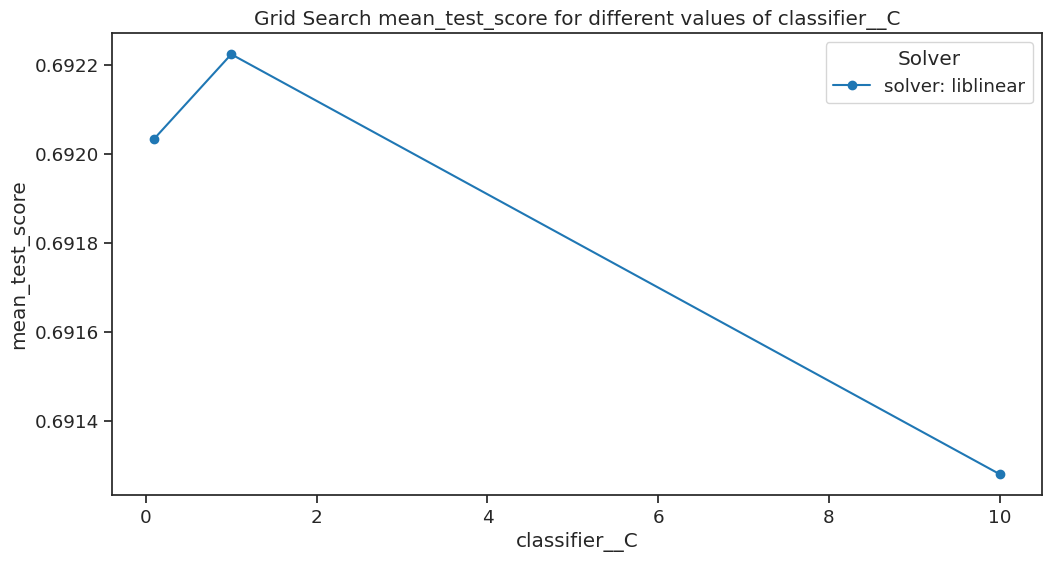

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract the results from GridSearchCV
results = grid_lr_adasyn.cv_results_

# Create a DataFrame with the results
results_df = pd.DataFrame(results)

# Function to plot line charts of grid search results
def plot_line_chart_grid_search(results_df, param, score='mean_test_score'):
    plt.figure(figsize=(12, 6))
    sns.set_context("notebook", font_scale=1.2)
    sns.set_style("ticks")

    # Extract unique values of the parameter
    unique_params = results_df[f'param_{param}'].unique()

    for solver in results_df['param_classifier__solver'].unique():
        subset = results_df[results_df['param_classifier__solver'] == solver]
        plt.plot(subset[f'param_{param}'], subset[score], label=f'solver: {solver}', marker='o')

    plt.title(f'Grid Search {score} for different values of {param}')
    plt.xlabel(param)
    plt.ylabel(score)
    plt.legend(title='Solver')
    plt.show()

# Example usage
plot_line_chart_grid_search(results_df, 'classifier__C', score='mean_test_score')


### Logistic Regression with ADASYN with Multiple Solvers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline
from loan_data_utils import evaluate_model
import joblib
import json
import numpy as np

# Define the updated hyperparameter grid ensuring compatibility
param_grid_lr_adasyn = [
    {
        'classifier__C': np.linspace(0.1, 10, 7),
        'classifier__solver': ['liblinear'],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__max_iter': [1000, 5000]
    },
    {
        'classifier__C': np.linspace(0.1, 10, 7),
        'classifier__solver': ['lbfgs'],
        'classifier__penalty': ['l2'],
        'classifier__max_iter': [1000, 5000]
    },
    # {
    #     'classifier__C': np.linspace(0.1, 10, 7),
    #     'classifier__solver': ['saga'],
    #     'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    #     'classifier__max_iter': [1000, 5000],
    #     'classifier__l1_ratio': [0.1, 0.5]  # Only relevant for elasticnet penalty
    # }
]

# Logistic Regression with ADASYN
pipeline_lr_adasyn = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', ADASYN()),
    ('classifier', LogisticRegression(random_state=42))
])

# Setup GridSearchCV
grid_lr_adasyn = GridSearchCV(pipeline_lr_adasyn, param_grid=param_grid_lr_adasyn, scoring='recall', cv=5)

# Fit the model
grid_lr_adasyn.fit(X_train, y_train)

# Get the best model and its parameters
best_lr_adasyn = grid_lr_adasyn.best_estimator_
print("Best Logistic Regression (ADASYN) Parameters:", grid_lr_adasyn.best_params_)

# Evaluate the best model
evaluation_results_lr_adasyn = evaluate_model(best_lr_adasyn, X_train, X_test, y_train, y_test, 'Logistic Regression (ADASYN)', 'Resampling')
print("\nLogistic Regression (ADASYN) - Best Model Evaluation:")
print(evaluation_results_lr_adasyn)

# Save the best parameters and model
joblib.dump(best_lr_adasyn, '/content/best_lr_adasyn.pkl')
with open('/content/best_params_lr_adasyn.json', 'w') as f:
    json.dump(grid_lr_adasyn.best_params_, f, indent=4)
with open('/content/evaluation_results_lr_adasyn.json', 'w') as f:
    json.dump(evaluation_results_lr_adasyn, f, indent=4)


#### Hyperparameters Summary Explanations

1. **`classifier__C`: Regularization Strength**:
    - **Description**: The `C` parameter controls the regularization strength in logistic regression. It is the inverse of the regularization term (lambda), meaning smaller values specify stronger regularization.
    - **Purpose**: Regularization helps prevent overfitting by penalizing large coefficients in the model. Adjusting `C` helps find the right balance between bias (underfitting) and variance (overfitting).

2. **`classifier__solver`: Optimization Algorithm**:
    - **Description**: The `solver` parameter specifies the algorithm used to optimize the logistic regression objective function.
    - **Purpose**: Different solvers have different properties, performance characteristics, and support for different types of regularization. Choosing the right solver can impact the efficiency and convergence of the model.

3. **`classifier__penalty`: Regularization Type**:
    - **Description**: The `penalty` parameter specifies the type of regularization applied to the logistic regression model.
    - **Purpose**: Regularization helps control model complexity and prevent overfitting. L1 regularization (Lasso) can produce sparse models by setting some coefficients to zero, while L2 regularization (Ridge) shrinks coefficients without eliminating them. Elasticnet combines both L1 and L2 penalties.

4. **`classifier__max_iter`: Maximum Iterations**:
    - **Description**: The `max_iter` parameter sets the maximum number of iterations taken for the solvers to converge.
    - **Purpose**: Ensuring that the solver has enough iterations to converge is crucial for finding the optimal solution. If the solver stops too early, the model may not reach the best possible parameters.

By exploring these hyperparameters, we aim to find the best combination that optimizes model performance, ensures convergence, and balances the trade-off between bias and variance in logistic regression.

#### Plot Complex Param Grid

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract the results from GridSearchCV
results = grid_lr_adasyn.cv_results_

# Create a DataFrame with the results
results_df = pd.DataFrame(results)

# Function to plot line charts of grid search results
def plot_grid_search_results(results_df, param1, param2=None, score='mean_test_score'):
    plt.figure(figsize=(14, 8))
    sns.set_context("notebook", font_scale=1.2)
    sns.set_style("ticks")

    # Check if param1 is in results
    if f'param_{param1}' not in results_df.columns:
        print(f"Parameter {param1} not found in results.")
        return

    # Check if param2 is provided and in results
    if param2 and f'param_{param2}' not in results_df.columns:
        print(f"Parameter {param2} not found in results.")
        return

    if param2:
        unique_param2 = results_df[f'param_{param2}'].unique()
        for val2 in unique_param2:
            subset = results_df[results_df[f'param_{param2}'] == val2]
            plt.plot(subset[f'param_{param1}'], subset[score], label=f'{param2}: {val2}', marker='o')
        plt.legend(title=param2)
    else:
        plt.plot(results_df[f'param_{param1}'], results_df[score], marker='o')

    plt.title(f'Grid Search {score} for different values of {param1} {"and " + param2 if param2 else ""}')
    plt.xlabel(param1)
    plt.ylabel(score)
    plt.show()

# Plot results for different parameter combinations
plot_grid_search_results(results_df, 'classifier__C', 'classifier__solver', score='mean_test_score')
plot_grid_search_results(results_df, 'classifier__C', 'classifier__penalty', score='mean_test_score')
plot_grid_search_results(results_df, 'classifier__C', 'classifier__max_iter', score='mean_test_score')
plot_grid_search_results(results_df, 'classifier__C', 'classifier__l1_ratio', score='mean_test_score')


NameError: name 'grid_lr_adasyn_expanded' is not defined

In [30]:
results_df[['params', 'param_classifier__C', 'mean_test_score', 'rank_test_score']]

,params,param_classifier__C,mean_test_score,rank_test_score
0,"{'classifier__C': 0.1, 'classifier__solver': '...",0.1,0.690716,3
1,"{'classifier__C': 1, 'classifier__solver': 'li...",1,0.691469,2
2,"{'classifier__C': 10, 'classifier__solver': 'l...",10,0.691470,1


Solvers in the context of logistic regression are algorithms used to optimize the cost function. The cost function measures how well the model is performing, and the solver attempts to find the parameter values that minimize this cost function. Different solvers use different techniques and approximations, which can affect the performance and efficiency of the optimization process.

#### Common Solvers in `LogisticRegression`

1. **liblinear**:
   - **Description**: This solver uses a coordinate descent algorithm, which updates one parameter at a time while holding others fixed. It is particularly suited for small datasets and L1 (Lasso) regularization.
   - **Advantages**: Good for small datasets, supports both L1 and L2 regularization.
   - **Disadvantages**: May not be efficient for very large datasets.

2. **lbfgs**:
   - **Description**: This solver uses the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm, which is an iterative method for solving unconstrained nonlinear optimization problems.
   - **Advantages**: Efficient for large datasets, supports L2 regularization.
   - **Disadvantages**: Does not support L1 regularization.

3. **sag**:
   - **Description**: Stochastic Average Gradient Descent solver, which is a variation of gradient descent that uses a stochastic approach to update the parameters.
   - **Advantages**: Efficient for very large datasets, supports L2 regularization.
   - **Disadvantages**: Requires the data to be standardized for optimal performance, does not support L1 regularization.

4. **saga**:
   - **Description**: Stochastic Average Gradient Augmented solver, which is an extension of the SAG solver and can handle both L1 and L2 regularization.
   - **Advantages**: Efficient for large datasets, supports both L1 and L2 regularization.
   - **Disadvantages**: Requires the data to be standardized for optimal performance.

5. **newton-cg**:
   - **Description**: Uses Newton's method with a conjugate gradient approach for optimization.
   - **Advantages**: Efficient for large datasets, supports L2 regularization.
   - **Disadvantages**: Computationally intensive, does not support L1 regularization.

### When to Use Each Solver

- **liblinear**: Use for small to medium-sized datasets and when you need L1 regularization.
- **lbfgs**: Use for large datasets and when you only need L2 regularization.
- **sag**: Use for very large datasets with L2 regularization.
- **saga**: Use for very large datasets when you need both L1 and L2 regularization.
- **newton-cg**: Use for large datasets with L2 regularization and when you need a more accurate solution but can afford the computational cost.

Each solver has its own strengths and weaknesses, and the choice of solver can affect the convergence speed and final performance of the logistic regression model. Experimenting with different solvers during hyperparameter tuning can help identify the best solver for a given dataset and problem.

### Logistic Regression with SMOTE

In [21]:
from imblearn.over_sampling import SMOTE

# Define the hyperparameter grid
param_grid_lr_smote = {
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['liblinear']
}

# Logistic Regression with SMOTE
pipeline_lr_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', SMOTE()),
    ('classifier', LogisticRegression(random_state=42))
])

# Setup GridSearchCV
grid_lr_smote = GridSearchCV(pipeline_lr_smote, param_grid=param_grid_lr_smote, scoring='recall', cv=5)

# Fit the model
grid_lr_smote.fit(X_train, y_train)

# Get the best model and its parameters
best_lr_smote = grid_lr_smote.best_estimator_
print("Best Logistic Regression (SMOTE) Parameters:", grid_lr_smote.best_params_)

# Evaluate the best model
evaluation_results_lr_smote = evaluate_model(best_lr_smote, X_train, X_test, y_train, y_test, 'Logistic Regression (SMOTE)', 'Resampling')
print("\nLogistic Regression (SMOTE) - Best Model Evaluation:")
print(evaluation_results_lr_smote)

# Save the best parameters and model
joblib.dump(best_lr_smote, '/content/best_lr_smote.pkl')
with open('/content/best_params_lr_smote.json', 'w') as f:
    json.dump(grid_lr_smote.best_params_, f, indent=4)
with open('/content/evaluation_results_lr_smote.json', 'w') as f:
    json.dump(evaluation_results_lr_smote, f, indent=4)


Best Logistic Regression (SMOTE) Parameters: {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}

Logistic Regression (SMOTE) - Best Model Evaluation:
{'Model': 'Logistic Regression (SMOTE)', 'Experiment': 'Resampling', 'Recall_0': 0.6794350524288466, 'Precision_0': 0.8674863387978142, 'F1_0': 0.7620304812192488, 'Recall_1': 0.6345139412207988, 'Precision_1': 0.3598290598290598, 'F1_1': 0.45923097900190896, 'F1_Macro': 0.6106307301105789, 'Accuracy': 0.6695}


### LGBM with RandomUnderSampler

In [23]:
from lightgbm import LGBMClassifier
from imblearn.under_sampling import RandomUnderSampler

# Define the hyperparameter grid
param_grid_lgbm = {
    'classifier__num_leaves': [31, 50],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__n_estimators': [100, 200]
}

# LGBM with RandomUnderSampler
pipeline_lgbm_rus = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', RandomUnderSampler()),
    ('classifier', LGBMClassifier(random_state=42, force_row_wise=True))
])

# Setup GridSearchCV
grid_lgbm_rus = GridSearchCV(pipeline_lgbm_rus, param_grid=param_grid_lgbm, scoring='recall', cv=5)

# Fit the model
grid_lgbm_rus.fit(X_train, y_train)

# Get the best model and its parameters
best_lgbm_rus = grid_lgbm_rus.best_estimator_
print("Best LGBM (RandomUnderSampler) Parameters:", grid_lgbm_rus.best_params_)

# Evaluate the best model
evaluation_results_lgbm_rus = evaluate_model(best_lgbm_rus, X_train, X_test, y_train, y_test, 'LGBM (RandomUnderSampler)', 'Resampling')
print("\nLGBM (RandomUnderSampler) - Best Model Evaluation:")
print(evaluation_results_lgbm_rus)

# Save the best parameters and model
joblib.dump(best_lgbm_rus, '/content/best_lgbm_rus.pkl')
with open('/content/best_params_lgbm_rus.json', 'w') as f:
    json.dump(grid_lgbm_rus.best_params_, f, indent=4)
with open('/content/evaluation_results_lgbm_rus.json', 'w') as f:
    json.dump(evaluation_results_lgbm_rus, f, indent=4)


[LightGBM] [Info] Number of positive: 4248, number of negative: 4248
[LightGBM] [Info] Total Bins 3257
[LightGBM] [Info] Number of data points in the train set: 8496, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 4247, number of negative: 4247
[LightGBM] [Info] Total Bins 3255
[LightGBM] [Info] Number of data points in the train set: 8494, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 4247, number of negative: 4247
[LightGBM] [Info] Total Bins 3255
[LightGBM] [Info] Number of data points in the train set: 8494, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 4247, number of negative: 4247
[LightGBM] [Info] Total Bins 3257
[LightGBM] [Info] Number of data points in the train set: 8494, number of u

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from loan_data_utils import load_and_preprocess_data, evaluate_model, compile_metrics, get_top_performers, plot_top_performers
import joblib
import logging
import warnings
import json

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'education', 'marriage']
target = 'default_payment_next_month'

# Load and preprocess data
X, y = load_and_preprocess_data(url, categorical_columns, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include(['category']).columns.tolist()

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ])

# Define the hyperparameter grids
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['liblinear']
}

param_grid_lgbm = {
    'classifier__num_leaves': [31, 50],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__n_estimators': [100, 200]
}

# Logistic Regression with ADASYN
pipeline_lr_adasyn = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', ADASYN()),
    ('classifier', LogisticRegression(random_state=42))
])

# Logistic Regression with SMOTE
pipeline_lr_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', SMOTE()),
    ('classifier', LogisticRegression(random_state=42))
])

# LGBM with RandomUnderSampler
pipeline_lgbm_rus = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', RandomUnderSampler()),
    ('classifier', LGBMClassifier(random_state=42))
])

# Setup GridSearchCV
grid_lr_adasyn = GridSearchCV(pipeline_lr_adasyn, param_grid=param_grid_lr, scoring='recall', cv=5)
grid_lr_smote = GridSearchCV(pipeline_lr_smote, param_grid=param_grid_lr, scoring='recall', cv=5)
grid_lgbm_rus = GridSearchCV(pipeline_lgbm_rus, param_grid=param_grid_lgbm, scoring='recall', cv=5)

# Fit the models
grid_lr_adasyn.fit(X_train, y_train)
grid_lr_smote.fit(X_train, y_train)
grid_lgbm_rus.fit(X_train, y_train)

# Get the best models and their parameters
best_lr_adasyn = grid_lr_adasyn.best_estimator_
best_lr_smote = grid_lr_smote.best_estimator_
best_lgbm_rus = grid_lgbm_rus.best_estimator_

# Print best parameters
print("Best Logistic Regression (ADASYN) Parameters:", grid_lr_adasyn.best_params_)
print("Best Logistic Regression (SMOTE) Parameters:", grid_lr_smote.best_params_)
print("Best LGBM (RandomUnderSampler) Parameters:", grid_lgbm_rus.best_params_)

# Evaluate the best models
evaluation_results_lr_adasyn = evaluate_model(best_lr_adasyn, X_train, X_test, y_train, y_test, 'Logistic Regression (ADASYN)', 'Resampling')
evaluation_results_lr_smote = evaluate_model(best_lr_smote, X_train, X_test, y_train, y_test, 'Logistic Regression (SMOTE)', 'Resampling')
evaluation_results_lgbm_rus = evaluate_model(best_lgbm_rus, X_train, X_test, y_train, y_test, 'LGBM (RandomUnderSampler)', 'Resampling')

print("\nLogistic Regression (ADASYN) - Best Model Evaluation:")
print(evaluation_results_lr_adasyn)

print("\nLogistic Regression (SMOTE) - Best Model Evaluation:")
print(evaluation_results_lr_smote)

print("\nLGBM (RandomUnderSampler) - Best Model Evaluation:")
print(evaluation_results_lgbm_rus)

# Dictionary to hold the best parameters and model information
best_params = {
    'Logistic Regression (ADASYN)': grid_lr_adasyn.best_params_,
    'Logistic Regression (SMOTE)': grid_lr_smote.best_params_,
    'LGBM (RandomUnderSampler)': grid_lgbm_rus.best_params_
}

# Save the best parameters to a JSON file
with open('/content/best_params.json', 'w') as f:
    json.dump(best_params, f, indent=4)

# Save the best models to joblib files
joblib.dump(best_lr_adasyn, '/content/best_lr_adasyn.pkl')
joblib.dump(best_lr_smote, '/content/best_lr_smote.pkl')
joblib.dump(best_lgbm_rus, '/content/best_lgbm_rus.pkl')

# Save the evaluation results to a text file
evaluation_results = {
    'Logistic Regression (ADASYN)': evaluation_results_lr_adasyn,
    'Logistic Regression (SMOTE)': evaluation_results_lr_smote,
    'LGBM (RandomUnderSampler)': evaluation_results_lgbm_rus
}

with open('/content/evaluation_results.json', 'w') as f:
    json.dump(evaluation_results, f, indent=4)

print("Best parameters and model evaluations saved successfully.")
